In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt


# Declaring Global Parameters

In [2]:
a = 15 # FORS Tree Height
# k = 10 # FORS Tree Number
val_arr = []

In [3]:
parameters = {
    "128S" : {
        "n":16,
        "h":66,
        "d":11,
        "k":9,
        "w":128,
        "a":a
    },
    "128F" : {
        "n":16,
        "h":63,
        "d":21,
        "k":19,
        "w":16,
        "a":a
    },
    "192S" : {
        "n":24,
        "h":63,
        "d":11,
        "k":13,
        "w":128,
        "a":a
    },
    "192F" : {
        "n":24,
        "h":63,
        "d":21,
        "k":30,
        "w":16,
        "a":a
    },
    "256S" : {
        "n":32,
        "h":66,
        "d":11,
        "k":19,
        "w":64,
        "a":a
    },
    "256F" : {
        "n":32,
        "h":64,
        "d":16,
        "k":34,
        "w":16,
        "a":a
    },
}

m = b"No one knows the reason for all this, but it is probably quantum. - Pyramids, Terry Pratchett (1989)"

# SPHINCS+ 

In [4]:
from package.sphincs import Sphincs

In [5]:
def SphincsUtil(n, h, d, w, a, k):
    sphincs = Sphincs()
    sphincs.set_n(n)
    sphincs.set_h(h)
    sphincs.set_d(d)
    sphincs.set_w(w)
    sphincs.set_a(a)
    sphincs.set_k(k)
    
    sk, pk = sphincs.generate_key_pair()
    print("Secret Key Size: ", len(sk))
    print("Public Key Size: ", len(pk))
    
    # print("Message to be signed: ", m)
    
    start = time.time()
    signature = sphincs.sign(m, sk)
    end = time.time()
    sign_time = end-start
    print("Time Taken to Sign", sign_time)
    print("Signature Size", len(signature), "bytes")
    
    start = time.time()
    verify_true = sphincs.verify(m, signature, pk)
    end = time.time()
    verify_time = end-start
    print("Time Taken to Verify", verify_time)
    
    print("Is signature correct ? ", verify_true)

    return {"SK Size": len(sk), "PK Size": len(pk), "Sign Size": len(signature), "Sign Time": sign_time, "Verify Time" : verify_time}


## SPHINCS+128S

In [6]:
param = parameters["128S"]
d = SphincsUtil(**param)
d["Name"] = "128S"
val_arr.append(d)

Secret Key Size:  64
Public Key Size:  32
Time Taken to Sign 18.456420421600342
Signature Size 9536 bytes
Time Taken to Verify 0.015913724899291992
Is signature correct ?  True


## SPHINCS+128F

In [7]:
param = parameters["128F"]
d = SphincsUtil(**param)
d["Name"] = "128F"
val_arr.append(d)


Secret Key Size:  64
Public Key Size:  32
Time Taken to Sign 30.35623288154602
Signature Size 17648 bytes
Time Taken to Verify 0.046462059020996094
Is signature correct ?  True


## SPHINCS+192S

In [8]:
param = parameters["192S"]
d = SphincsUtil(**param)
d["Name"] = "192S"
val_arr.append(d)


Secret Key Size:  96
Public Key Size:  48
Time Taken to Sign 21.79711627960205
Signature Size 19800 bytes
Time Taken to Verify 0.022855281829833984
Is signature correct ?  False


## SPHINCS+192F

In [9]:
param = parameters["192F"]
SphincsUtil(**param)
d = SphincsUtil(**param)
d["Name"] = "192F"
val_arr.append(d)


Secret Key Size:  96
Public Key Size:  48
Time Taken to Sign 32.246856689453125
Signature Size 38760 bytes
Time Taken to Verify 0.05181455612182617
Is signature correct ?  True
Secret Key Size:  96
Public Key Size:  48
Time Taken to Sign 31.466235637664795
Signature Size 38760 bytes
Time Taken to Verify 0.040888071060180664
Is signature correct ?  True


## SPHINCS+256S

In [10]:
param = parameters["256S"]
SphincsUtil(**param)
d = SphincsUtil(**param)
d["Name"] = "256S"
val_arr.append(d)


Secret Key Size:  128
Public Key Size:  64
Time Taken to Sign 22.780853509902954
Signature Size 35456 bytes
Time Taken to Verify 0.027509212493896484
Is signature correct ?  True
Secret Key Size:  128
Public Key Size:  64
Time Taken to Sign 22.548629999160767
Signature Size 35456 bytes
Time Taken to Verify 0.026840686798095703
Is signature correct ?  True


## SPHINCS+256F

In [11]:
param = parameters["256F"]
SphincsUtil(**param)
d = SphincsUtil(**param)
d["Name"] = "256F"
val_arr.append(d)


Secret Key Size:  128
Public Key Size:  64
Time Taken to Sign 38.69648861885071
Signature Size 53792 bytes
Time Taken to Verify 0.053227901458740234
Is signature correct ?  True
Secret Key Size:  128
Public Key Size:  64
Time Taken to Sign 35.49716782569885
Signature Size 53792 bytes
Time Taken to Verify 0.03943991661071777
Is signature correct ?  True


In [13]:
df = pd.DataFrame(val_arr)

In [14]:
df.head()

,SK Size,PK Size,Sign Size,Sign Time,Verify Time,Name
0,64,32,9536,18.456420,0.015914,128S
1,64,32,17648,30.356233,0.046462,128F
2,96,48,19800,21.797116,0.022855,192S
3,96,48,38760,31.466236,0.040888,192F
4,128,64,35456,22.548630,0.026841,256S


<AxesSubplot:xlabel='Name'>

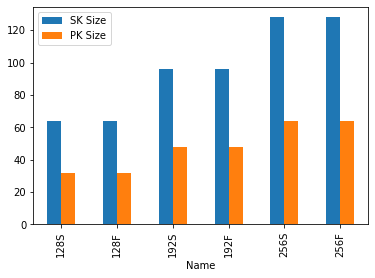

In [19]:
df.plot(x="Name", y=["SK Size","PK Size"], kind="bar")


<AxesSubplot:xlabel='Name'>

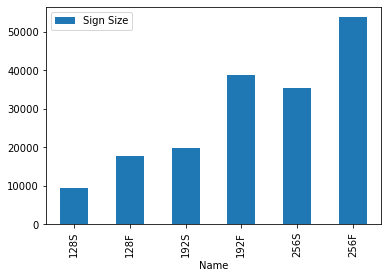

In [20]:
df.plot(x="Name", y=["Sign Size"], kind="bar")

<AxesSubplot:xlabel='Name'>

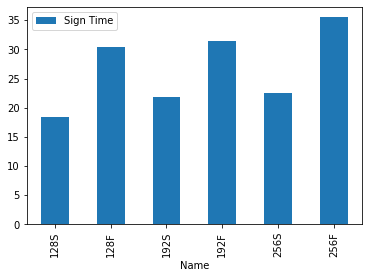

In [22]:
df.plot(x="Name", y=["Sign Time"], kind="bar")

<AxesSubplot:xlabel='Name'>

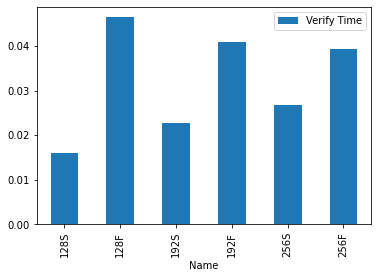

In [23]:
df.plot(x="Name", y=["Verify Time"], kind="bar")